In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
DAP_SPECIES = "PSIMIAE"
#DAP_SPECIES = "ECOLI"

In [3]:
selected_cols = ["chr", "start", "end", 'min_score', 'max_score', 'mean_score',\
             'num_overlapping_hits','orientation', 'prefferred_target_loc', 'length', 'midpoint',\
              "intergenic_start", "intergenic_end", "intergenic_label",\
             "u_ori", "u_name","tf_id", 'species', 'target_location', \
             'u_is_ortho', 'd_is_ortho', 'target_is_ortho', ]

In [6]:
DATA_PATH    = F"/global/homes/v/vsevim/scratch/ML/grammar/data/{DAP_SPECIES}_RESULTS"
fimo_df_path = f"{DATA_PATH}/ALL_FIMO_HITS_ANNOTATED_W_PEAKS.pkl"
#merged_df_path = f"{DATA_PATH}/ALL_FIMO_HITS_ANNOTATED_OVERLAPPING_MERGED_STAGE_v01_2.pkl"

In [7]:
min_num_sites = 10
max_dist = 205

df_all_occurrences_merged = pd.read_pickle(fimo_df_path)
ortho_filter = (df_all_occurrences_merged.target_is_ortho) & (df_all_occurrences_merged.dist_to_pref_tgt <= max_dist) 
df_merged_valid = df_all_occurrences_merged[ortho_filter] 

# Visualize motif length distribution

----------------------------

In [8]:
select_brevi = df_all_occurrences_merged.species == 'Brevundimonas_sp_GW460-12-10-14-LB2'
df_brevi = df_all_occurrences_merged[select_brevi]

In [9]:
df_brevi[df_brevi.target_is_ortho]
df_brevi.tf_id.unique()

array([227, 101, 534, 393,  32, 278, 167,   4,  47,  76, 379, 173,  24,
        80, 344, 405, 412, 414, 338,  41, 249, 548,  81, 501, 116, 404,
       177, 380, 156, 136, 114, 182, 103, 302, 109, 240,  74, 524, 178,
       428, 268, 186])

--------------------------

# Counts

In [13]:
num_sites = len(df_merged_valid)
num_tfs   = len(df_merged_valid['tf_id'].unique())
num_promoters = len(df_merged_valid['intergenic_label'].unique())
num_total_motif_hits = len(df_merged_valid)
tf_site_counts = df_merged_valid['tf_id'].value_counts()
num_tfs_w_num_sites_above_thresh = np.sum(tf_site_counts.values >= min_num_sites)
num_species = len(df_merged_valid.species.unique())

print(f"* Stats for {DAP_SPECIES} pooled filtered data *\n")
print(f"{num_species} species")
print(f"{num_total_motif_hits}\t motif hits")
print(f"{num_sites}\t total sites with valid targets & midpoint-start <= {max_dist}")
print(f"{num_tfs}\t TFs")
print(f"{num_promoters}\t promoters")
print(f"{num_tfs_w_num_sites_above_thresh}\t TF have at least {min_num_sites} sites")

* Stats for PSIMIAE pooled filtered data *

48 species
3153	 motif hits
3153	 total sites with valid targets & midpoint-start <= 205
112	 TFs
1535	 promoters
83	 TF have at least 10 sites


In [14]:
species = sorted(df_merged_valid.species.unique())
import pickle
pickle.dump( species, open( f"{DAP_SPECIES}_species.p", "wb" ))

In [15]:
df_merged_valid.columns

Index(['chr', 'start', 'end', 'score', 'strand', 'x', 'anno', 'intergenic_chr',
       'intergenic_start', 'intergenic_end', 'intergenic_label', 'u_type',
       'u_start', 'u_end', 'u_ori', 'u_accession', 'u_name', 'dw_type',
       'd_start', 'd_end', 'd_ori', 'd_accession', 'd_name', 'tf_id',
       'species', 'target_location', 'u_is_ortho', 'd_is_ortho',
       'target_is_ortho', 'peak_id', 'peak_enrichment', 'peak_start',
       'peak_end', 'indexcol', 'redundant', 'midpoint', 'length',
       'prefferred_target_loc', 'dist_to_pref_tgt'],
      dtype='object')

# Count plots

## sites

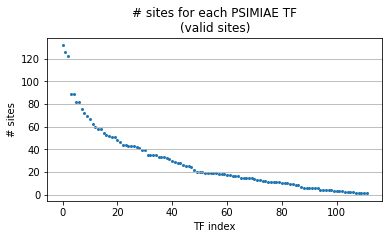

In [16]:
fig, ax = plt.subplots(figsize=(6,3))
counts = df_merged_valid['tf_id'].value_counts().sort_values()
tf_ids = df_merged_valid['tf_id'].unique()

y = sorted(counts.values, reverse=True)
x = range(len(y))
plt.scatter(x, y, s=4)
plt.grid(True, axis='y')
plt.xlabel('TF index')
plt.ylabel('# sites')
plt.title(f'# sites for each {DAP_SPECIES} TF\n(valid sites)')
plt.show()

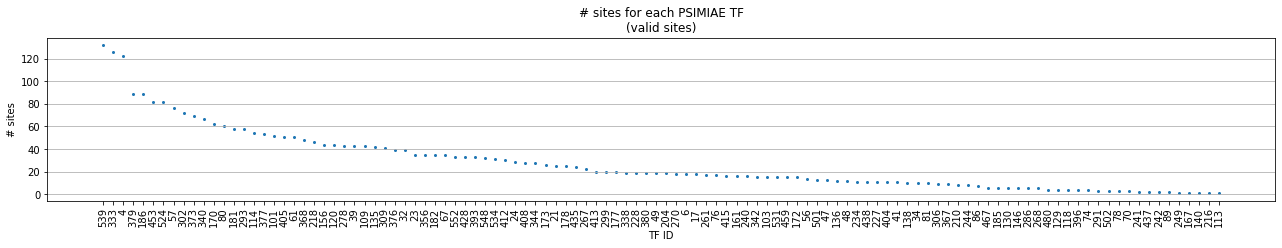

In [17]:
fig, ax = plt.subplots(figsize=(22,3))
counts = df_merged_valid['tf_id'].value_counts()

y = counts.values
x = range(len(y))
ticks = counts.index.values

plt.scatter(x, y, s=4)
plt.grid(True, axis='y')
plt.xticks(x, ticks, rotation=90)
plt.xlabel('TF ID')
plt.ylabel('# sites')
plt.title(f'# sites for each {DAP_SPECIES} TF\n(valid sites)')
plt.show()

## TFs per promoter

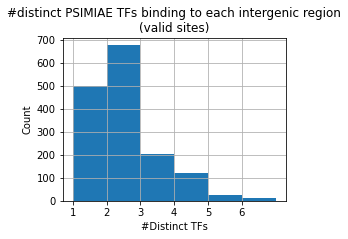

In [18]:
fig, ax = plt.subplots(figsize=(4,3))
y = sorted(counts.values, reverse=True)
x = range(len(y))
df_merged_valid['intergenic_label'].value_counts().hist(bins=[1,2,3,4,5,6,7,])
plt.grid(True, axis='y')
plt.ylabel('Count')
plt.xlabel('#Distinct TFs')
#plt.yscale('log')
plt.xticks([1,2,3,4,5,6,])
plt.title(f'#distinct {DAP_SPECIES} TFs binding to each intergenic region\n(valid sites)')
plt.show()

## Promoters per TF

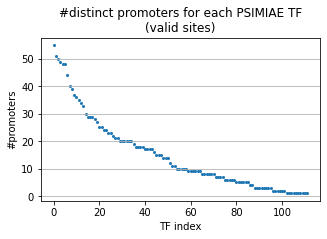

In [19]:
fig, ax = plt.subplots(figsize=(5,3))
counts = df_merged_valid.groupby('tf_id')['intergenic_label'].nunique()
y = sorted(counts.values, reverse=True)
x = range(len(y))
plt.scatter(x, y, s=4)
plt.grid(True, axis='y')
plt.xlabel('TF index')
plt.ylabel('#promoters')
plt.title(f'#distinct promoters for each {DAP_SPECIES} TF\n(valid sites)')
plt.show()

## Number of sites per TF per promoter

In [20]:
df_groups = df_merged_valid.groupby(['tf_id'])
count_list = []
num_min_sites = 2
for group_name, df_group in df_groups:
    #Count number of promoters with at least two sites for this tf
    count = np.sum(df_group['intergenic_label'].value_counts()>=num_min_sites)
    count_list += [(group_name, count)]
    
names = ['TF', 'num_promoters_w_2_or_more_compound_sites']
df_site_counts = pd.DataFrame(count_list, columns=names)

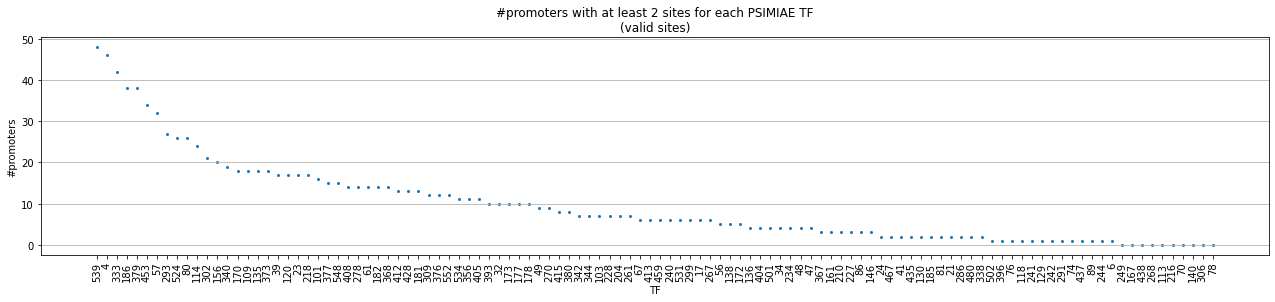

In [21]:
df_site_counts = df_site_counts.sort_values(by='num_promoters_w_2_or_more_compound_sites', ascending=False)

fig, ax = plt.subplots(figsize=(22,4))
y = df_site_counts['num_promoters_w_2_or_more_compound_sites']
x = range(len(df_site_counts))
ticks = df_site_counts['TF']
plt.scatter(x, y, s=4)
plt.xticks(x, ticks, rotation=90)
plt.grid(True, axis='y')
plt.xlabel('TF')
plt.ylabel('#promoters')
plt.title(f'#promoters with at least {num_min_sites} sites for each {DAP_SPECIES} TF\n(valid sites)')
plt.show()

In [22]:
np.sum(df_site_counts.num_promoters_w_2_or_more_compound_sites >= 1)
#df_site_counts

102

## Plot distances between sites

In [23]:
df_colors = pd.read_pickle(f'tf_class_colors_{DAP_SPECIES}.pkl.gz')

In [24]:
tf_ids = df_merged_valid.tf_id.unique()
num_min_sites = 2
tf_distances = []
for tf_id in tf_ids:
    # Select records for this tf 
    tf_filter = (df_merged_valid.tf_id == tf_id)
    df_tf = df_merged_valid[tf_filter].sort_values(by='start')

    dummy_distances = []
    # Group by integenic region
    df_groups = df_tf.groupby(['intergenic_label'])
    for group_name, df_group in df_groups:
        # Select regions with at least 2 sites for this tf 
        if len(df_group) == 2:
            index_1, index_2 = df_group.index.values
            # Check if entries are sorted by the start coord
            start_1 = df_group.loc[index_1].start
            start_2 = df_group.loc[index_2].start
            end_1 = df_group.loc[index_1].end
            end_2 = df_group.loc[index_2].end
            mid_1 = df_group.loc[index_1].midpoint
            mid_2 = df_group.loc[index_2].midpoint
            intergenic_label = group_name
             

            if  start_1 > start_2:
                print(f"{group_name} sites are not ordered.")
                break
    
            # Calculate midpoint distance
            end_to_end_dist = end_2 - start_1        
            in_between_dist = start_2 - end_1
            midpoint_dist = mid_2 - mid_1
            if tf_id == 340:
                print(tf_id, group_name, end_to_end_dist, in_between_dist, midpoint_dist)
                
            tf_distances += [[tf_id, end_to_end_dist, in_between_dist, midpoint_dist, intergenic_label]]      
            
            
df_tf_distances = pd.DataFrame(tf_distances, columns=["tf_id", "outer_distance", "inner_distance", "midpoint_distance", "intergenic_label"])

340 CP007637.1:01011 13 -5 4
340 NC_000964.3:00364 13 -5 4
340 NC_002516.2:00921 13 -5 4
340 NC_002516.2:02465 40 22 31
340 NC_002947.4:00960 13 -5 4
340 NC_014323.1:01584 20 2 11
340 NC_014323.1:04023 31 13 22
340 NC_019936.1:01071 13 -5 4
340 NZ_CP012830.1:01912 40 22 31
340 NZ_CP012830.1:01913 33 15 24
340 NZ_CP012830.1:02908 13 -5 4
340 NZ_CP012831.1:00921 13 -5 4
340 NZ_CP015225.1:02527 13 -5 4
340 NZ_CP015225.1:03460 33 15 24
340 NZ_JIBE01000003.1:00681 40 22 31
340 NZ_KK211142.1:03118 40 22 31
340 NZ_LKBJ01000002.1:04014 13 -5 4
340 NZ_LUKJ01000003.1:03561 13 -5 4
340 NZ_LUKZ01000014.1:02716 40 22 31


In [25]:
df_tf_dist_crosstab = pd.crosstab(df_tf_distances.tf_id, df_tf_distances.midpoint_distance)

# Define a sort order for TFs.
# Sort by minimum distance
df_tf_min_dist = df_tf_distances.groupby('tf_id')['midpoint_distance'].min()
tfs_sorted_by_min_dist = df_tf_min_dist.sort_values().index

In [26]:
filter_by_tf = df_tf_distances.tf_id == 453
df_tf_distances[filter_by_tf].sort_values(by='intergenic_label').head(20)

tf_id  outer_distance  inner_distance  midpoint_distance  \
5     453              35             -15                 10   
6     453              35             -15                 10   
7     453              35             -15                 10   
8     453              35             -15                 10   
9     453              35             -15                 10   
10    453              35             -15                 10   
11    453              35             -15                 10   
12    453              35             -15                 10   
13    453              35             -15                 10   
14    453              35             -15                 10   
15    453              35             -15                 10   
16    453              35             -15                 10   
17    453              35             -15                 10   
18    453              35             -15                 10   
19    453              35             -15                 10   
20    453              35             -15                 10   
21    453              35             -15                 10   
22    453              35             -15                 10   
23    453              35             -15                 10   
24    453              35             -15                 10   

           intergenic_label  
5          CP007637.1:00703  
6         NC_000913.3:00068  
7         NC_000964.3:01452  
8         NC_002947.4:01120  
9         NC_003197.2:00104  
10        NC_004741.1:00068  
11        NC_008570.1:03338  
12        NC_008577.1:03730  
13        NC_008700.1:00317  
14        NC_009792.1:02303  
15        NC_010681.1:06025  
16        NC_011740.1:00088  
17        NC_014121.1:01048  
18        NC_014323.1:00286  
19      NZ_CP008920.1:03435  
20      NZ_CP012830.1:02599  
21      NZ_CP015225.1:04560  
22      NZ_CP021235.1:01993  
23      NZ_CP037857.1:00068  
24  NZ_LKBJ01000002.1:01390

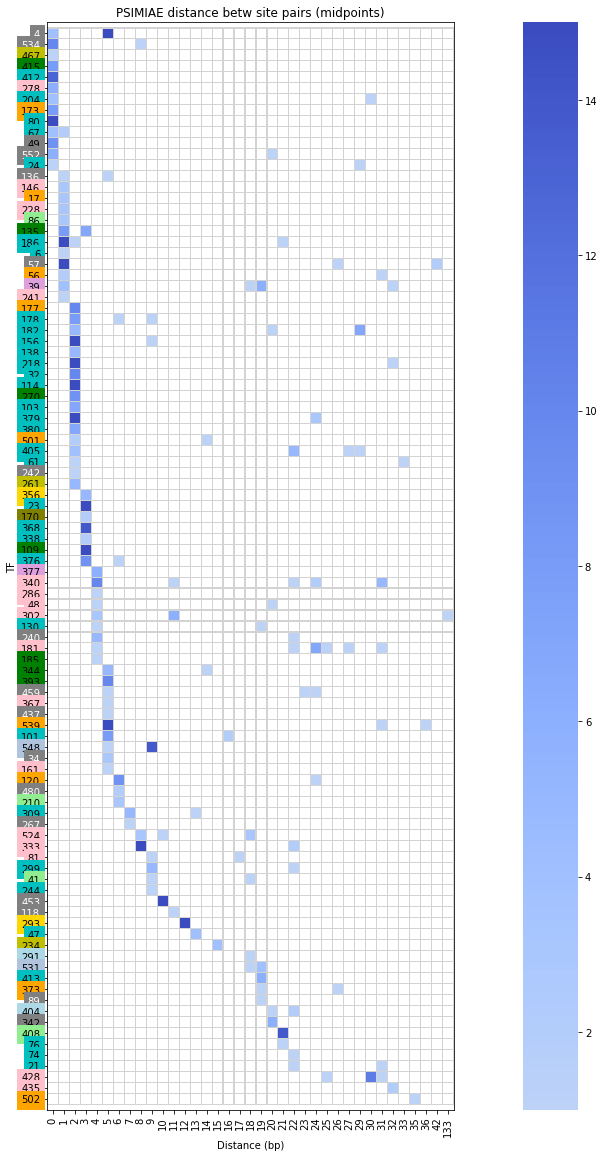

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df_heatmap = df_tf_dist_crosstab.loc[tfs_sorted_by_min_dist]
vmax = df_heatmap.describe().loc['max'].max()
mask = df_heatmap.values == 0
fig, ax = plt.subplots(figsize=(25,20))   
fig.patch.set_facecolor("white")
sns.heatmap(df_tf_dist_crosstab.loc[tfs_sorted_by_min_dist],
            ax=ax, cmap='coolwarm_r',center=-3, vmin=1, vmax=15,
            linewidths=0.1, linecolor='lightgrey', square=True, mask=mask)

for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.title(f'{DAP_SPECIES} distance betw site pairs (midpoints)')
plt.xlabel('Distance (bp)')
plt.ylabel('TF')
tf_nos_list = df_colors.index.values

for tick_obj in ax.yaxis.get_ticklabels():
    if DAP_SPECIES == "PSIMIAE":
        tf_no = int(tick_obj.get_text())
    elif DAP_SPECIES == "ECOLI":
        tf_no = tick_obj.get_text()
    
    if tf_no in tf_nos_list:
        color = df_colors.loc[tf_no]['class']
        tick_obj.set_backgroundcolor(color)
    else:
        tick_obj.set_backgroundcolor("gray")
        tick_obj.set_color("w")

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [28]:
#tf_no
df_colors.index.values

array([  6,  17,  20,  21,  23,  24,  30,  32,  39,  41,  47,  48,  49,
        56,  59,  61,  67,  70,  74,  76,  78,  80,  81,  86, 101, 103,
       109, 113, 114, 116, 120, 130, 135, 138, 146, 156, 161, 167, 170,
       172, 173, 177, 178, 181, 182, 185, 186, 204, 210, 218, 221, 227,
       228, 234, 241, 244, 249, 261, 268, 270, 278, 286, 291, 293, 299,
       302, 306, 309, 329, 333, 335, 338, 340, 342, 344, 356, 358, 367,
       368, 373, 376, 377, 379, 380, 393, 404, 405, 408, 412, 413, 415,
       428, 435, 438, 467, 501, 502, 524, 531, 539, 548])

### Binned heatmap for midpoint distance

The plot above shows all distances that appear. I bin them to reduce the noise a bit. ( Distances may fluctuate a bit for biological reasons, also motif caller could make small errors in locating the binding site.)

In [29]:
binsize = 5
bins = range(0, 280, binsize)

tf_ids = []
binned_distances_list = []
df_groups = df_tf_distances.groupby(['tf_id'])

for tf, df_group in df_groups:        
    tf_ids += [tf]
    distances = df_group.midpoint_distance.values
    binned_distances, dummy_bins = np.histogram(distances, bins)
    binned_distances_list += [list(binned_distances)]
    
df_binned_distances = pd.DataFrame(binned_distances_list, columns=bins[:-1])
df_binned_distances['tf_id'] = tf_ids
df_binned_distances = df_binned_distances.set_index('tf_id')

(98.5, -0.5)

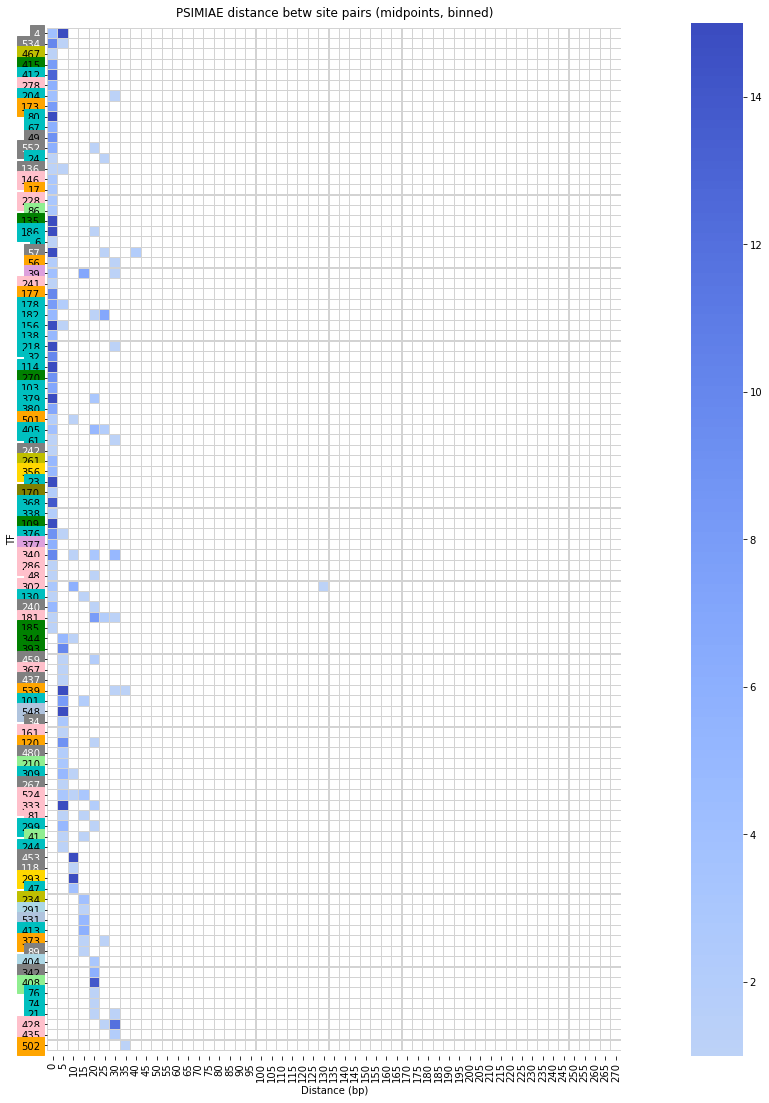

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
df_heatmap = df_binned_distances.loc[tfs_sorted_by_min_dist]

vmax = df_heatmap.describe().loc['max'].max()
mask = df_heatmap.values == 0
fig, ax = plt.subplots(figsize=(25,19))   
fig.patch.set_facecolor("white")
sns.heatmap(df_binned_distances.loc[tfs_sorted_by_min_dist],
            ax=ax, cmap='coolwarm_r',center=-3, vmin=1, vmax=15,
            linewidths=0.1, linecolor='lightgrey', square=True, mask=mask)

tf_nos_list = df_colors.index.values

for tick_obj in ax.yaxis.get_ticklabels():
    if DAP_SPECIES == "PSIMIAE":
        tf_no = int(tick_obj.get_text())
    elif DAP_SPECIES == "ECOLI":
        tf_no = tick_obj.get_text() 
    
    if tf_no in tf_nos_list:
        color = df_colors.loc[tf_no]['class']
        tick_obj.set_backgroundcolor(color)
    else:
        tick_obj.set_backgroundcolor("gray")
        tick_obj.set_color("w")

plt.title(f'{DAP_SPECIES} distance betw site pairs (midpoints, binned)')
plt.xlabel('Distance (bp)')
plt.ylabel('TF')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update

## How many TFs with irregular spacing between sites?

In [31]:
irregulars = 0
regulars = 0
for index, item in df_tf_dist_crosstab.iterrows():
    spacings = np.sum(item > 0)
    
    # Count irregulars
    if spacings > 1:
        irregulars += 1
    else:
        regulars += 1

print(regulars, irregulars)

54 44


# Orientations [obsolete]

In [34]:
# df = df_merged_valid[['tf_id', 'strand']].copy()
# ori_values = []
# for index, row in df.iterrows():
#     ori = row.strand 
#     if ori == "both":
#         val = 0
#     elif ori == '+' or ori == "-":
#         val = 1
#     else:
#         print("Something wrong with orientation:", ori)
    
#     ori_values += [val]

# df['directionality'] = ori_values

In [35]:
# counts = df.groupby('tf_id')['directionality'].mean()
# counts.sort_values(inplace=True)

In [37]:
# df[df.tf_id==146]

In [38]:
# fig, ax = plt.subplots(figsize=(22,3))
# y = counts.values
# x = range(len(y))
# ticks = counts.index.values
# plt.scatter(x, y, s=4)
# plt.grid(True, axis='y')
# plt.xlabel('TF id')
# plt.ylabel('Avg directionality')
# plt.yticks([0,1],['all bidirectional\nsites', 'all unidirectional\nsites'])
# plt.xticks(x, ticks, rotation=90)
# plt.title(f'Average directionality of all sites of TF')
# plt.show()

# Distribution of midpoint to start codon for all ortho sites

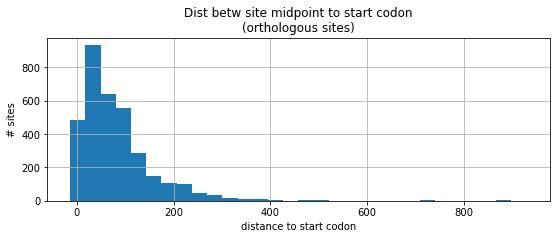

In [39]:
select_ortho = df_all_occurrences_merged.target_is_ortho  
df_merged_ortho = df_all_occurrences_merged[select_ortho] 

fig, ax = plt.subplots(figsize=(9,3))
counts = df_merged_ortho['tf_id'].value_counts()
y = counts.values
x = counts.index.values
df_merged_ortho.dist_to_pref_tgt.hist(bins=30)
plt.grid(True, axis='y')
plt.xlabel('distance to start codon')
plt.ylabel('# sites')
plt.title(f'Dist betw site midpoint to start codon\n(orthologous sites)')
plt.show()

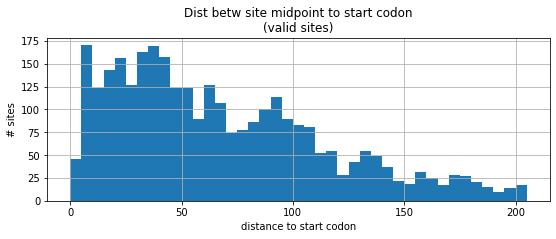

In [40]:
fig, ax = plt.subplots(figsize=(9,3))
# counts = df_merged_ortho['tf_id'].value_counts()
# y = counts.values
# x = counts.index.values
bins = range(0,max_dist+1,5)
df_merged_valid.dist_to_pref_tgt.hist(bins=bins)
plt.grid(True, axis='y')
plt.xlabel('distance to start codon')
plt.ylabel('# sites')
plt.title(f'Dist betw site midpoint to start codon\n(valid sites)')
plt.show()

In [41]:
def plot_tf_sites(df, tf_id, only_psimiae=False):
    bins = range(0,max_dist+1,5)
    select = (df.tf_id == tf_id) 
    if only_psimiae:
        select = select & (df.species == "Pseudomonas_simiae_WCS417")

    df_this_tf = df[select]
    print(len(df_this_tf))
    fig, ax = plt.subplots(figsize=(9,3))
    df_this_tf.dist_to_pref_tgt.hist(bins=bins, )
    plt.grid(True, axis='y')
    plt.xlabel('distance')
    plt.ylabel('#count')
    #plt.yticks([0,1,2])
    title = f'TF={tf_id}, Dist betw site midpoint to start codon\n(valid sites)'
    if only_psimiae:
        title += " only P.simiae targets"
    plt.title(title)
    plt.show()

In [42]:
tf_ids = df_merged_valid['tf_id'].unique()

In [43]:
tf_ids[-12:]

array([291,  56, 109, 338,  17, 367, 373, 380, 404, 428, 437, 249])

4


17






1


6


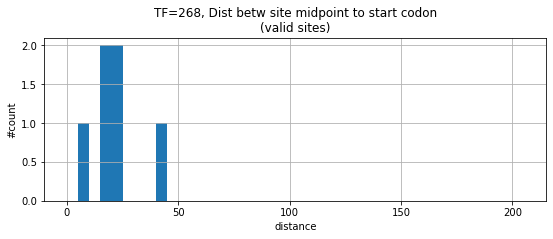





4


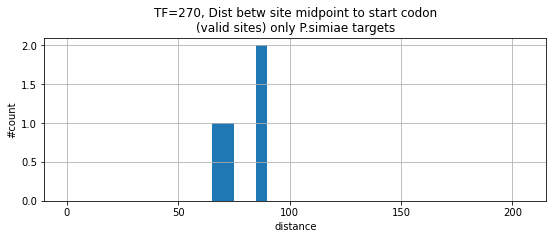

18


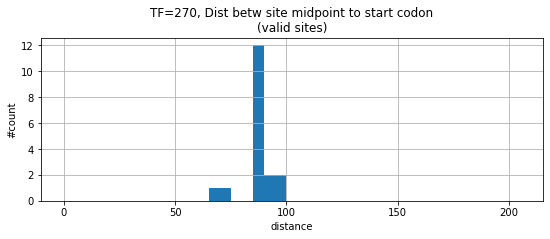





1


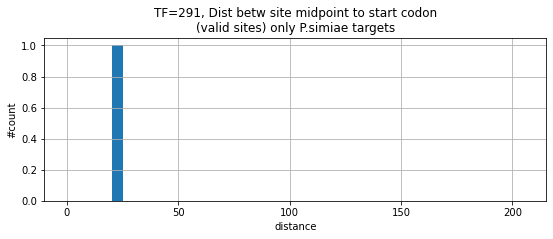

3


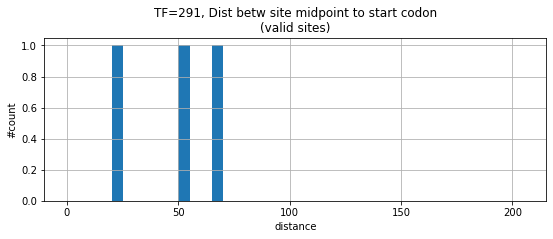





2


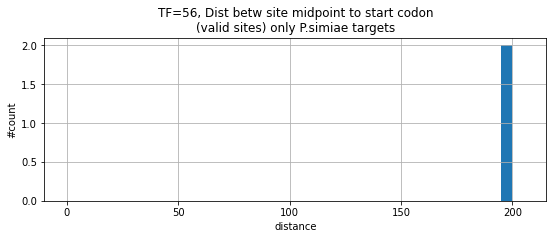

14


In [44]:
for tf in tf_ids[-15:-10]:
    plot_tf_sites(df_merged_valid, tf, only_psimiae=True)
    plot_tf_sites(df_merged_valid, tf, only_psimiae=False)
    print("\n\n\n")
    #if tf > 150:
    #    break

# Mean site length

## All valid

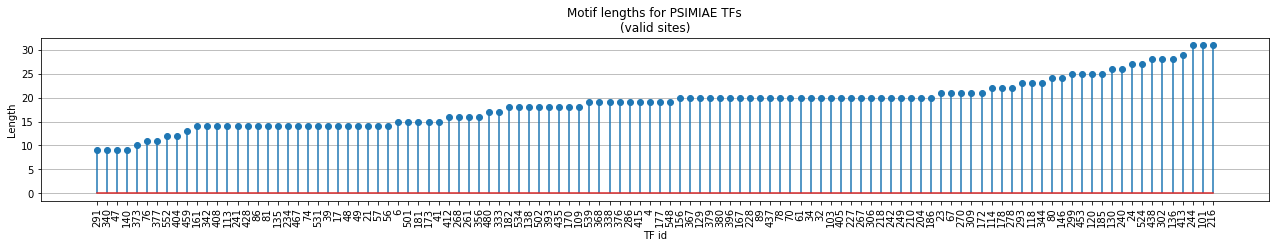

In [45]:
fig, ax = plt.subplots(figsize=(22,3))
lengths = df_merged_valid.groupby('tf_id')['length'].mean().sort_values()
#stdevs = df_merged_valid.groupby('tf_id')['length'].std()

#y = sorted(lengths.values, reverse=True)
y = lengths.values
x = range(len(y))
ticks = lengths.index.values
plt.stem(x, y)
plt.grid(True, axis='y')
plt.xlabel('TF id')
plt.ylabel('Length')
plt.xticks(x, ticks, rotation=90)
plt.title(f'Motif lengths for {DAP_SPECIES} TFs\n(valid sites)')
plt.show()

## Only abundant TFs

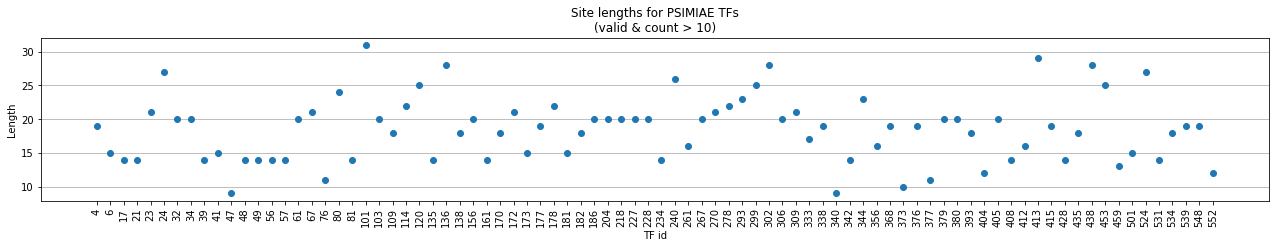

In [46]:
abundant_tf_ids = counts[counts >= 10].index.values
select_abundant = df_merged_valid['tf_id'].isin(abundant_tf_ids)
df_abundant = df_merged_valid[select_abundant]

fig, ax = plt.subplots(figsize=(22,3))
lengths = df_abundant.groupby('tf_id')['length'].mean()
stdevs = df_abundant.groupby('tf_id')['length'].std()

#y = sorted(lengths.values, reverse=True)
y = lengths.values
x = range(len(y))
ticks = lengths.index.values
plt.errorbar(x, y, stdevs, fmt='o')
plt.grid(True, axis='y')
plt.xlabel('TF id')
plt.ylabel('Length')
plt.xticks(x, ticks, rotation=90)
plt.title(f'Site lengths for {DAP_SPECIES} TFs\n(valid & count > 10)')
plt.show()

# Do TFs prefer to be at a certain distance for regulation?

## Target species: all

In [47]:
abundant_tf_ids = counts[counts >= 10].index.values

In [48]:
len(abundant_tf_ids)

85

In [49]:
bins = range(0,max_dist+1,5)
all_tfs_hist = []

for tf in abundant_tf_ids:
    #fig, ax = plt.subplots(figsize=(9,3))

    counts = df_merged_valid['tf_id'].value_counts()
    select_tf = df_merged_valid.tf_id == tf
    df_select_tf = df_merged_valid[select_tf]
    distances = df_select_tf.dist_to_pref_tgt.values
    hist = np.histogram(distances, bins, density=False) 
    all_tfs_hist += [list(hist[0])]
    
# Create a df from histograms
num_bins = len(bins) - 1
column_names = bins[:num_bins]
df_heatmap = pd.DataFrame(all_tfs_hist, columns=column_names)
df_heatmap = df_heatmap.set_index(abundant_tf_ids)

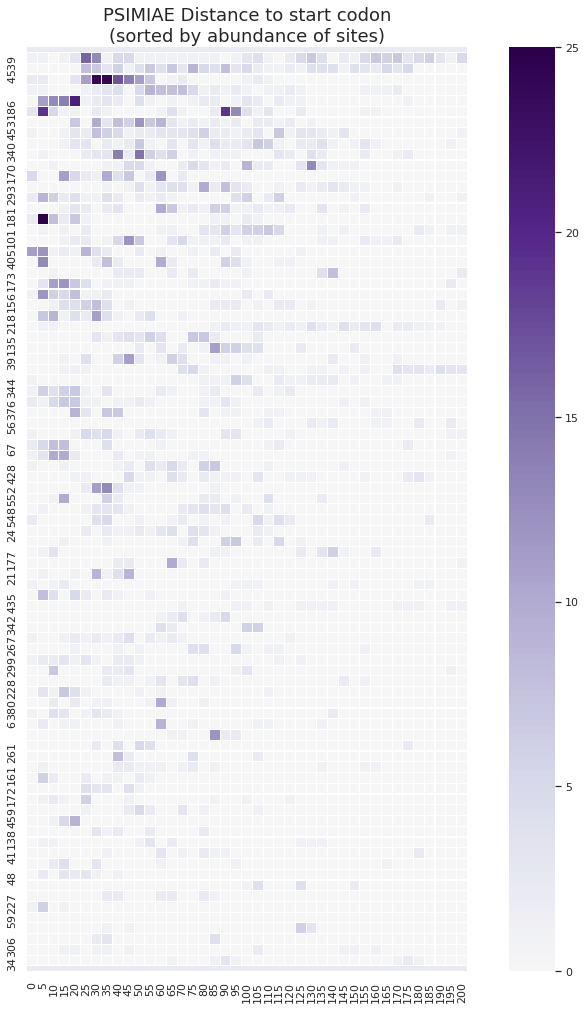

In [50]:
import seaborn as sns
vmax = df_heatmap.describe().loc['max'].max()
sns.set(font_scale=1)
figsize = (15,17)
fig, ax = plt.subplots(figsize=figsize)
ax.set_title(f"{DAP_SPECIES} Distance to start codon\n(sorted by abundance of sites)", fontsize=18)

ax = sns.heatmap(df_heatmap,
     center=0, vmin=0, vmax=vmax,
     cmap='PuOr', ax=ax,
     linewidths=0.1, square=True)

    
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

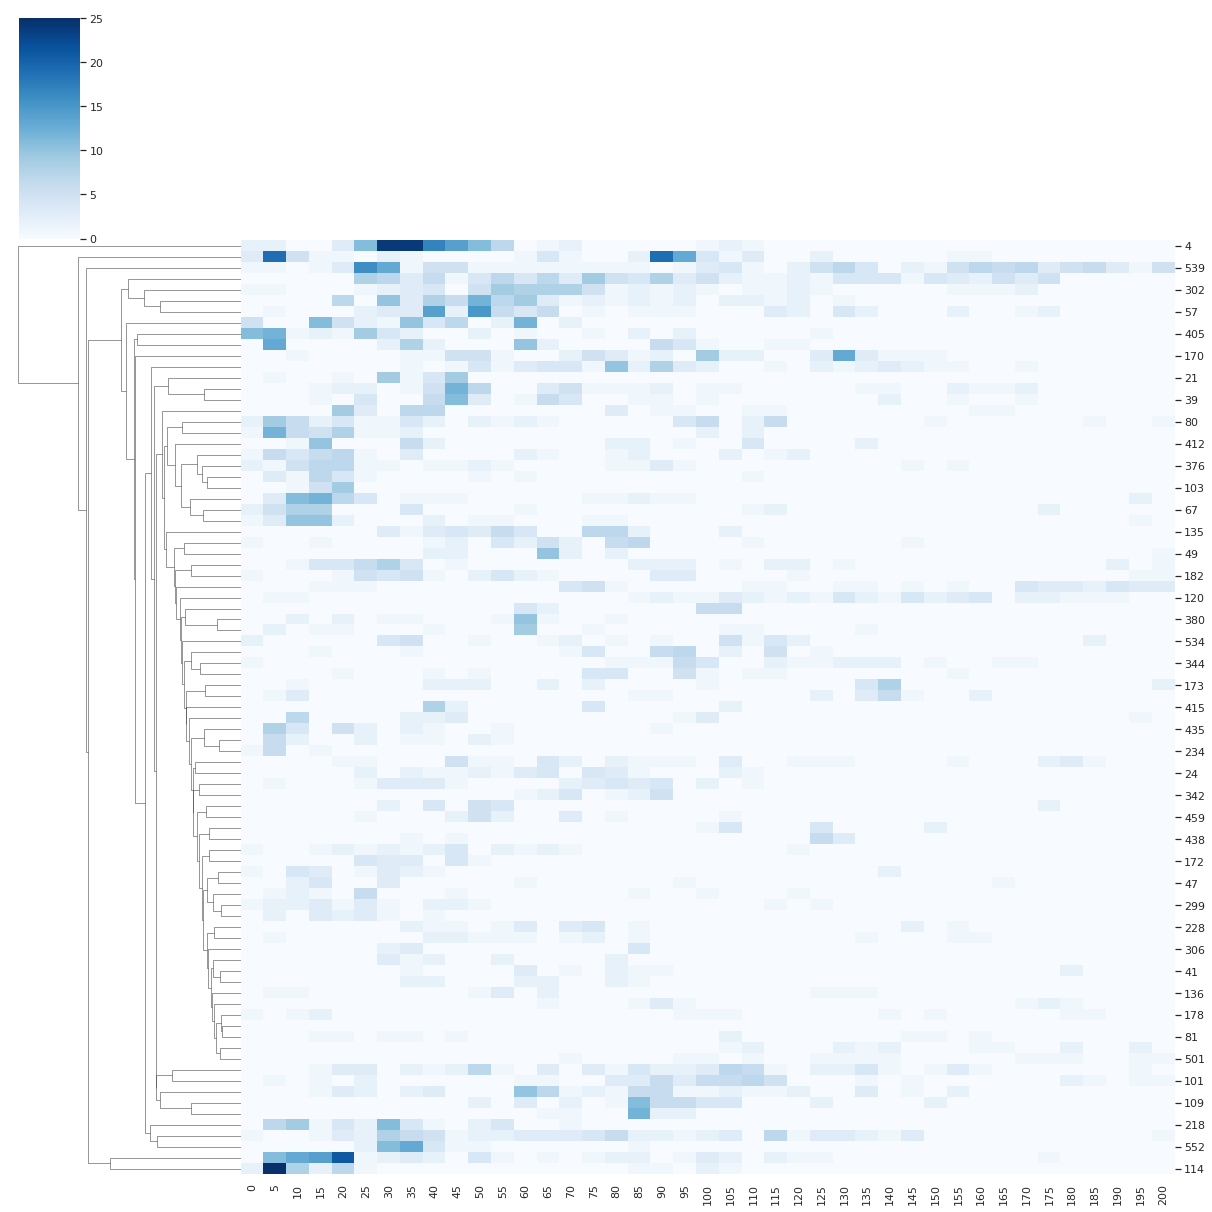

In [51]:
figsize=(17,17)
sns.set(font_scale=1)
sns.clustermap(df_heatmap, figsize=figsize, col_cluster=False, cmap='Blues')

In [52]:
figsize=(17,17)
sns.clustermap(df_heatmap, figsize=figsize, col_cluster=False, metric='cityblock', cmap='Blues')

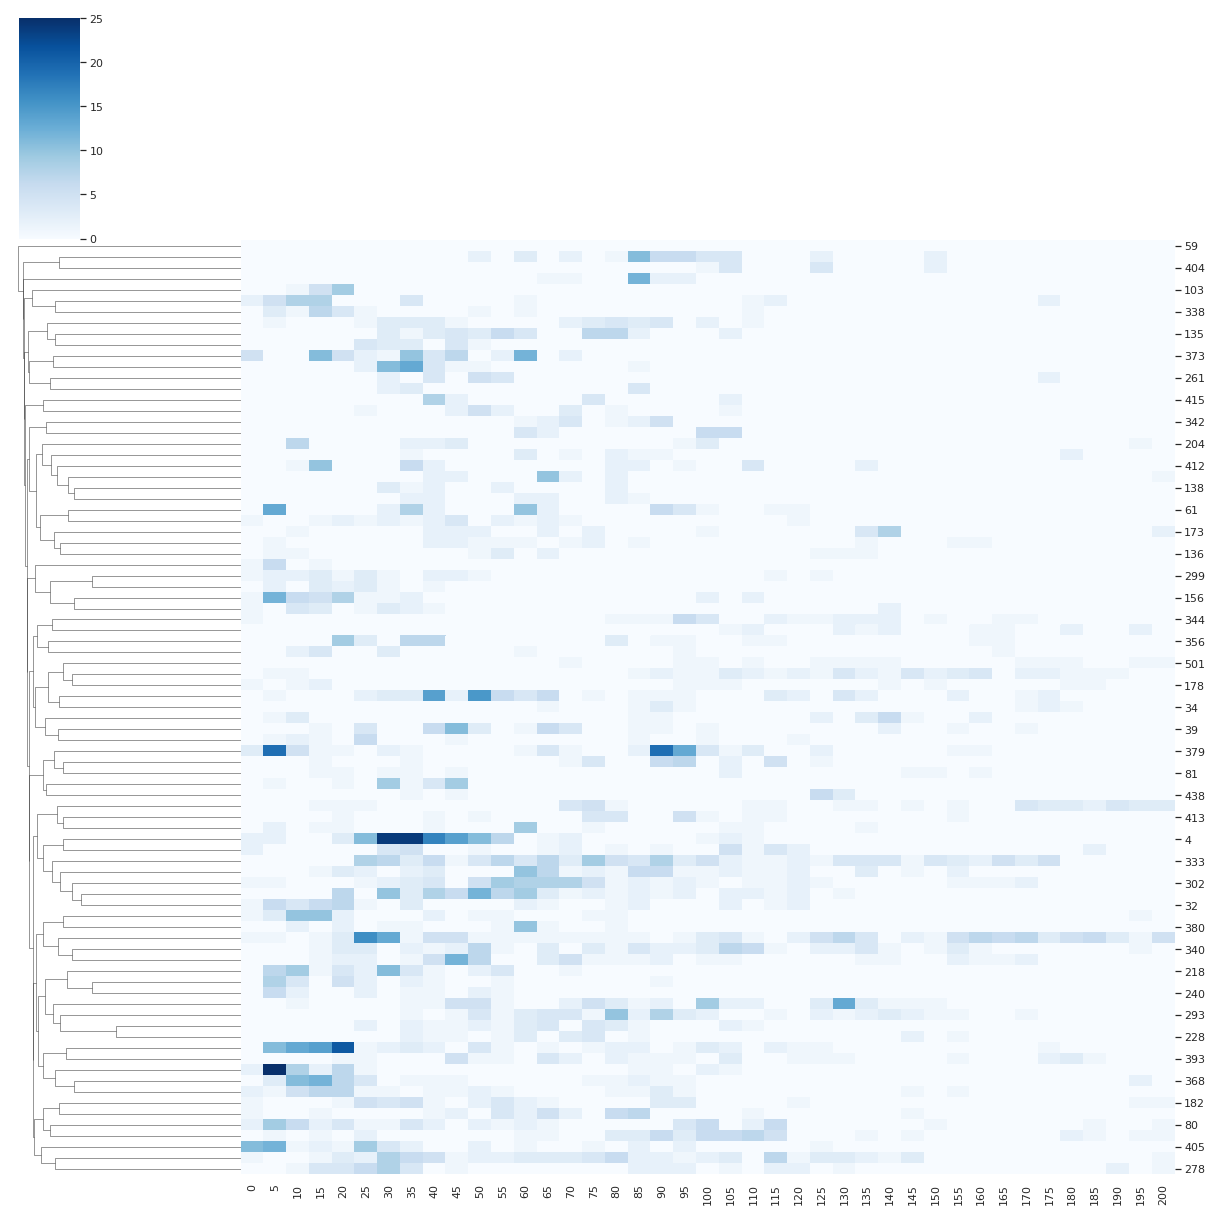

In [53]:
sns.clustermap(df_heatmap, figsize=figsize, col_cluster=False, metric='jaccard', cmap='Blues')